In [4]:
##############################
######The great shift ########
##############################
import numpy as np
import os
import matplotlib.pyplot as plt
import sys
import math
root = '/project/wyin/jlee/ml-project'
util_loc = os.path.join(root, "utils")
sys.path.append(util_loc)
data_loc = '/project/wyin/jlee/ml-project/dos-prediction-full/data'
k_data_loc = '/project/wyin/jlee/ml-project/data-collection/full-dataset/data'
from utilities import UnscaledData

In [7]:
data = UnscaledData(data_loc, X_name = "dos", y_name = "params")

In [8]:
def min_max(param_arr):
    count = 0
    mx = -1e6
    mn = 1e6
    mx_params = (-1, -1, -1)
    mn_params = (-1, -1, -1)
    for t1, t2, j in param_arr:
        if t1 < 0 and t2 > 0:
            k_dat = np.loadtxt(os.path.join(k_data_loc, f'param_{t1:.2f}_{t2:.2f}_{j:.3f}', 'disp_10-01.dat'))
            e_m = k_dat[32, 1]
            
            if e_m > mx:
                mx = e_m
                mx_params = (t1, t2, j)
            
            if e_m < mn:
                mn = e_m
                mn_params = (t1, t2, j)
            
    return mn, mx, mn_params, mx_params
    
print(min_max(data.train_y))

(-3.74812, -1.66401, (-0.5, 0.5, 0.2), (-0.02, 0.02, 1.0))


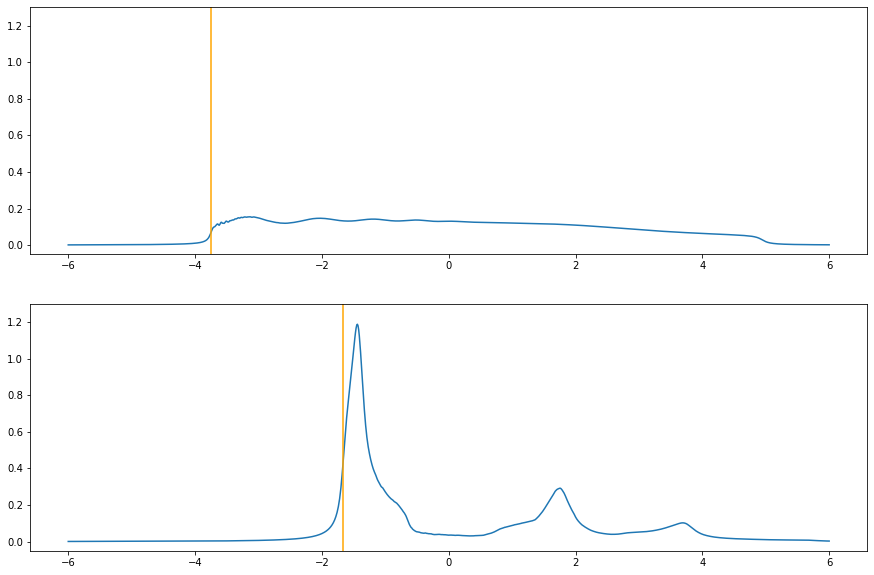

In [40]:


fig, ax = plt.subplots(2, figsize = (15, 10))
ax[0].set_ylim(-0.05, 1.3)
ax[1].set_ylim(-0.05, 1.3)

#Unshifted
dos1 = np.loadtxt(os.path.join(k_data_loc, f'param_-0.50_0.50_0.200', 'dos.dat'))
k_dat1 = np.loadtxt(os.path.join(k_data_loc, f'param_-0.50_0.50_0.200', 'disp_10-01.dat'))
e_m1 = k_dat1[32, 1]

ax[0].plot(dos1[:,0], dos1[:,1])
ax[0].vlines(e_m1, -0.05, 1.3, color = "orange")

dos2 = np.loadtxt(os.path.join(k_data_loc, f'param_-0.02_0.02_1.000', 'dos.dat'))
k_dat2 = np.loadtxt(os.path.join(k_data_loc, f'param_-0.02_0.02_1.000', 'disp_10-01.dat'))
e_m2 = k_dat2[32, 1]

ax[1].plot(dos2[:,0], dos2[:,1])
ax[1].vlines(e_m2, -0.05, 1.3, color = "orange")

# dos2 = np.loadtxt(os.path.join(k_data_loc, f'param_))



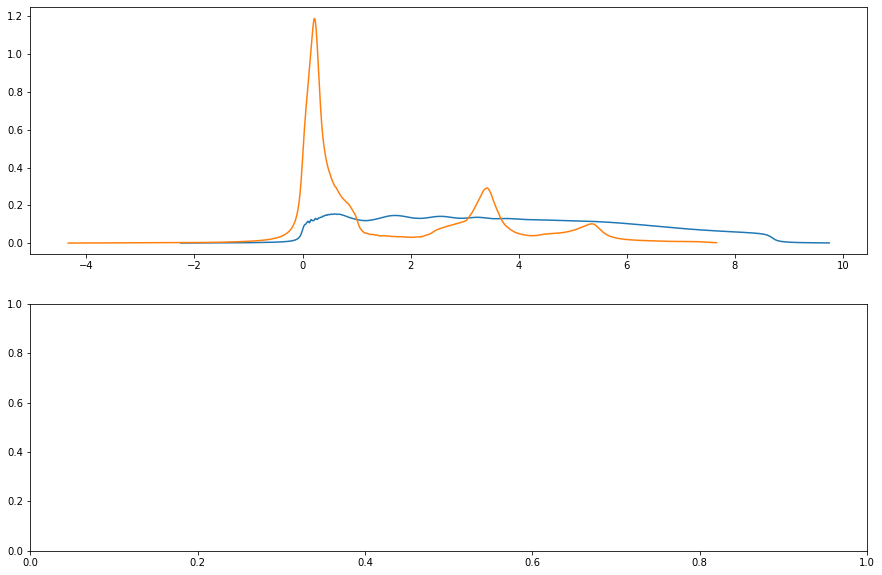

In [41]:
fig, ax = plt.subplots(2, figsize = (15, 10))

ax[0].plot(dos1[:,0] - e_m1, dos1[:,1])
ax[0].plot(dos2[:,0] - e_m2, dos2[:,1])